In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def makeEvenSize(X, border=cv2.BORDER_REFLECT101):
    """
    Copy image and extent data in order to get even size, if needed

    This function extends the array by a line in either
    down, right or both directions in order to get an even size.


    Args:
        X: np.ndarray arra
        border: border type to be used for extension (opencv convention)

    Example::

        # build a (5,5,3) shaped array
        X = np.dstack(3*(np.arange(25).reshape(5,5),))

        Y = makeEvenSize(X)

        print X[:,:,0]
        print Y[:,:,0]


        # In [211]: X[:,:,0]
        # array([[ 0,  1,  2,  3,  4],
        #        [ 5,  6,  7,  8,  9],
        #        [10, 11, 12, 13, 14],
        #        [15, 16, 17, 18, 19],
        #        [20, 21, 22, 23, 24]])
        #
        # In [212]: Y[:,:,0]
        # array([[ 0,  1,  2,  3,  4,  3],
        #        [ 5,  6,  7,  8,  9,  8],
        #        [10, 11, 12, 13, 14, 13],
        #        [15, 16, 17, 18, 19, 18],
        #        [20, 21, 22, 23, 24, 23],
        #        [15, 16, 17, 18, 19, 18]], dtype=int32)


    """

    height, width = X.shape[0:2]

    top = 0
    bottom = (height % 2 == 1)
    left = 0
    right = (width % 2 == 1)

    Y = cv2.copyMakeBorder(X, top, bottom, left, right, border)

    return Y 

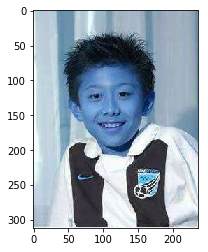

In [3]:
#分成R,G,B三个通道
img1 = cv2.imread("./pic/test1.jpg")
img1 =  makeEvenSize(img1)
plt.imshow(img1)
img1 = img1.astype('float')        #将uint8转化为float类型
b1, g1, r1 = cv2.split(img1)
#归一化
b1 /= 255
g1 /= 255
r1 /= 255


In [4]:
img2 = cv2.imread("./pic/output.jpg")
img2 =  makeEvenSize(img2)
img2 = img2.astype('float')        #将uint8转化为float类型
b2, g2, r2 = cv2.split(img2)
#归一化
b2 /= 255
g2 /= 255
r2 /= 255

In [5]:
#图1
b1_dct = cv2.dct(b1)         #进行离散余弦变换
g1_dct = cv2.dct(g1)         #进行离散余弦变换
r1_dct = cv2.dct(r1)         #进行离散余弦变换

In [6]:
#图2进行离散余弦变换
b2_dct = cv2.dct(b2)         #进行离散余弦变换
g2_dct = cv2.dct(g2)         #进行离散余弦变换
r2_dct = cv2.dct(r2)         #进行离散余弦变换

(([], <a list of 0 Text xticklabel objects>),
 ([], <a list of 0 Text yticklabel objects>))

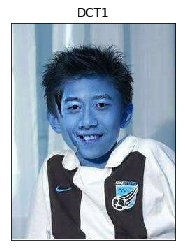

In [14]:
#图像融合
b1_m = 0.1*b1_dct+0.9*b2_dct
g1_m = 0.1*g1_dct+0.9*g2_dct
r2_m = 0.1*r1_dct+0.9*r2_dct
##反变换
b1_recor = abs(cv2.idct(b1_m))
g1_recor = abs(cv2.idct(g1_m))
r1_recor = abs(cv2.idct(r2_m)) 
b1_recor*=255
g1_recor*=255
r1_recor*=255
#融合
merged = cv2.merge([b1_recor,g1_recor,r1_recor])
merged = merged.astype('uint8')
cv2.imwrite('./pic/merged1.jpg', merged)  # 对齐的图数据保存
#pic_recover
plt.imshow(merged)
plt.title('DCT1')
plt.xticks([]), plt.yticks([])

(([], <a list of 0 Text xticklabel objects>),
 ([], <a list of 0 Text yticklabel objects>))

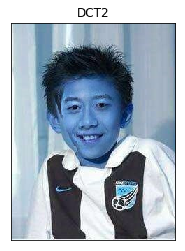

In [15]:
#图像融合
b1_m = 0.3*b1_dct+0.7*b2_dct
g1_m = 0.3*g1_dct+0.7*g2_dct
r2_m = 0.3*r1_dct+0.7*r2_dct
##反变换
b1_recor = abs(cv2.idct(b1_m))
g1_recor = abs(cv2.idct(g1_m))
r1_recor = abs(cv2.idct(r2_m)) 
b1_recor*=255
g1_recor*=255
r1_recor*=255
#融合
merged = cv2.merge([b1_recor,g1_recor,r1_recor])
merged = merged.astype('uint8')
cv2.imwrite('./pic/merged2.jpg', merged)  # 对齐的图数据保存
#pic_recover
plt.imshow(merged)
plt.title('DCT2')
plt.xticks([]), plt.yticks([])

(([], <a list of 0 Text xticklabel objects>),
 ([], <a list of 0 Text yticklabel objects>))

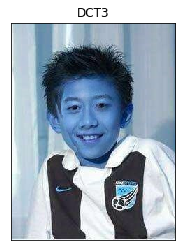

In [16]:
#图像融合
b1_m = 0.5*b1_dct+0.5*b2_dct
g1_m = 0.5*g1_dct+0.5*g2_dct
r2_m = 0.5*r1_dct+0.5*r2_dct
##反变换
b1_recor = abs(cv2.idct(b1_m))
g1_recor = abs(cv2.idct(g1_m))
r1_recor = abs(cv2.idct(r2_m)) 
b1_recor*=255
g1_recor*=255
r1_recor*=255
#融合
merged = cv2.merge([b1_recor,g1_recor,r1_recor])
merged = merged.astype('uint8')
cv2.imwrite('./pic/merged3.jpg', merged)  # 对齐的图数据保存
#pic_recover
plt.imshow(merged)
plt.title('DCT3')
plt.xticks([]), plt.yticks([])